# SVM

## SVM을 이용한 Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.data import gapminder

In [2]:
data=gapminder()
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [3]:
df_asia = px.data.gapminder().query("continent=='Asia'")          # 아시아 국가만
df_oce = px.data.gapminder().query("continent=='Oceania'")        # 오세아니아 국가만
fig = px.line(df_oce, x="year", y="lifeExp", color='country')
fig.show()

In [4]:
# split X and Y
X=data[['country','continent','year','pop','gdpPercap']]
y=data.lifeExp

In [5]:
# X의 categorical data에 대하여 더미변수 생성
X=pd.get_dummies(data=X, columns=['country','continent'], drop_first=True)
X

,year,pop,gdpPercap,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Bahrain,...,country_Venezuela,country_Vietnam,country_West Bank and Gaza,"country_Yemen, Rep.",country_Zambia,country_Zimbabwe,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,8425333,779.445314,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1957,9240934,820.853030,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1962,10267083,853.100710,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1967,11537966,836.197138,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1972,13079460,739.981106,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1987,9216418,706.157306,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1700,1992,10704340,693.420786,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1701,1997,11404948,792.449960,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1702,2002,11926563,672.038623,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# Train / Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [7]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=8, gamma=0.1)
model.fit(X_train, y_train)

# train 데이터에서의 성능
train_score = model.score(X_train, y_train)

# test 데이터에서의 성능
test_score = model.score(X_test, y_test)

# y_train으로 예측한 데이터
y_pred = model.predict(X_test)

In [9]:
# 비교
pd.DataFrame([y_pred, y_test]).T.rename({0:'pred', 1:'actual'}, axis=1).tail(10)

,pred,actual
331,57.133611,52.970
332,41.737153,34.906
333,50.715885,44.600
334,44.456357,46.242
335,53.883477,56.155
336,61.104941,61.368
337,70.229560,70.750
338,67.782506,69.150
339,75.386484,75.380
340,52.417354,47.991


In [10]:
# RMSE 구하기
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

3.7138417207305787


In [11]:
# plotly를 이용한 시각화
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_pred, y=y_test, mode='markers'))
fig.add_trace(go.Scatter(x=np.arange(min(y_test),max(y_test)), y=np.arange(min(y_test),max(y_test))))
fig.update_layout(width=1200, height=800)
fig.show()

## SVM을 이용한 Classification

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly.data import iris

In [13]:
data=iris()

In [14]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [15]:
fig = px.scatter_3d(data,
                    x='sepal_length',
                    y='sepal_width',
                    z='petal_width',
                    color='petal_length',
                    symbol='species',
                    opacity=0.7)
fig.show()

In [16]:
fig = px.scatter_matrix(data,
                        dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
                        color='species')
fig.update_layout(width=1200, height=800)
fig.show()

/opt/anaconda3/envs/IMJeongseon/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [17]:
X=data[['sepal_width', 'sepal_length', 'petal_width','petal_length']]
y=data.species

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [19]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=8, gamma=0.1)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

y_pred = model.predict(X_test)

In [21]:
pd.DataFrame([y_pred, y_test]).T.rename({0:'pred', 1:'actual'}, axis=1).tail(10)

,pred,actual
20,versicolor,versicolor
21,setosa,setosa
22,versicolor,versicolor
23,setosa,setosa
24,virginica,virginica
25,virginica,virginica
26,versicolor,versicolor
27,setosa,setosa
28,virginica,virginica
29,virginica,virginica


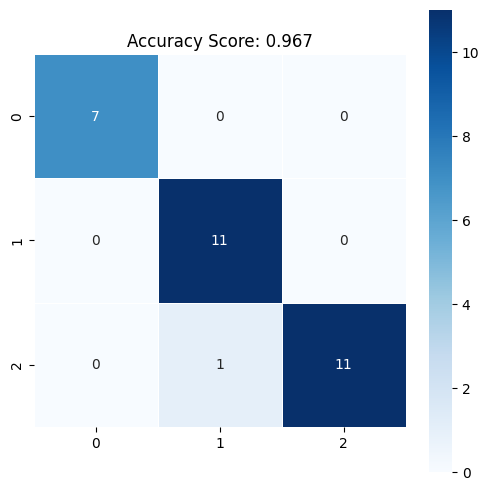

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
all_sample_title = 'Accuracy Score: {:.3f}'.format(test_score)
plt.title(all_sample_title, size = 12)
plt.show()

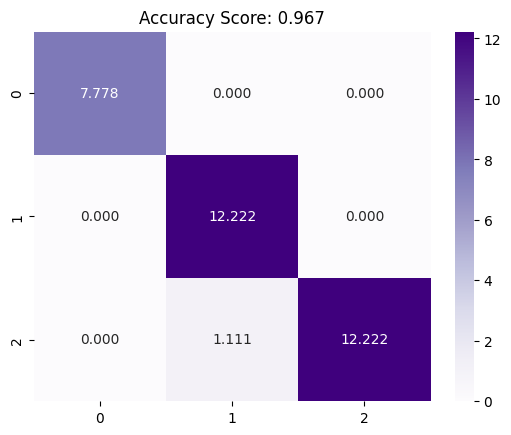

In [23]:
CM=pd.DataFrame(cm)
CM=CM.apply(lambda x: 100*(x/sum(CM))/sum(sum(cm)),axis=1)
all_sample_title = 'Accuracy Score: {:.3f}'.format(test_score)
plt.title(all_sample_title, size = 12)
sns.heatmap(CM, fmt='.3f', annot=True, cmap = 'Purples')
plt.show()